In [1]:
import cv2
import numpy as np
import pathlib

import torch

from segmentation_models_pytorch import Unet
from utils import image

c:\Users\ADMIN\anaconda3\envs\card_classification\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
MODEL_FILE = "pretrained/model_final.pt"

In [4]:
def predict_image(model, image):
    with torch.no_grad():
        output = model(image.to(device))

    output = output.detach().cpu().numpy()[0]
    output = output.transpose((1, 2, 0))
    output = np.uint8(output)
    _, output = cv2.threshold(output, 127, 255, cv2.THRESH_BINARY_INV)

    return output


In [5]:
model = Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1,
)
model = model.to(device)

checkpoint = torch.load(pathlib.Path(MODEL_FILE))
model.load_state_dict(checkpoint)
# model.load_state_dict(checkpoint)
model.to(device)
model.eval()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8956\2927913680.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pathlib.Path(MODEL_FILE))


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [6]:
import matplotlib.pyplot as plt

In [7]:
database = '../database/'

Prediction...


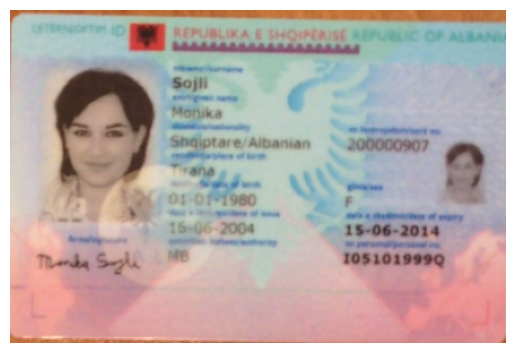

In [8]:
INPUT_FILE = "dataset/train/test_frames/image/image68.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')

plt.imshow(warped)
plt.savefig(database +'1.png', bbox_inches='tight')

Prediction...


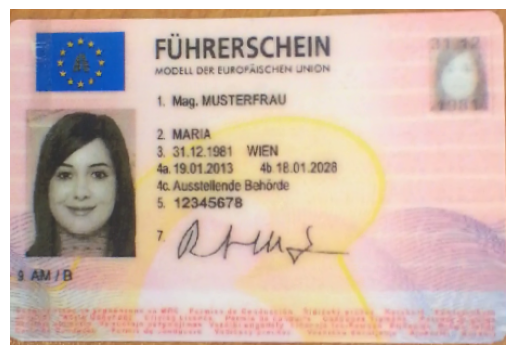

In [9]:
INPUT_FILE = "dataset/train/test_frames/image/image175.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'2.png', bbox_inches='tight')

Prediction...


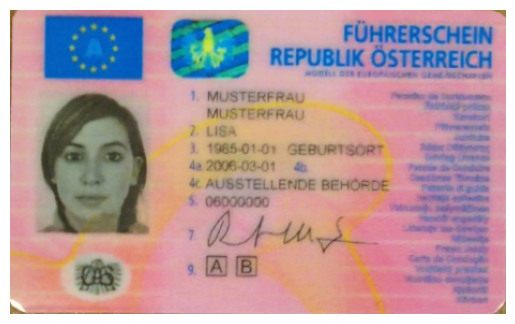

In [10]:
INPUT_FILE = "dataset/train/test_frames/image/image246.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'3.png', bbox_inches='tight')

Prediction...


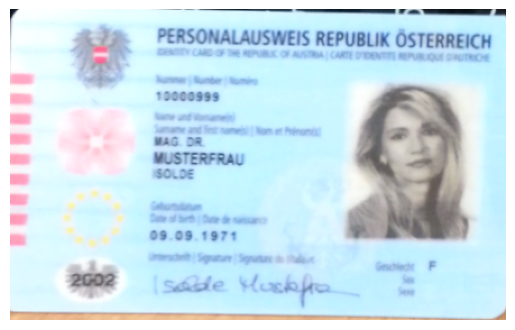

In [11]:
INPUT_FILE = "dataset/train/test_frames/image/image320.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'4.png', bbox_inches='tight')

Prediction...


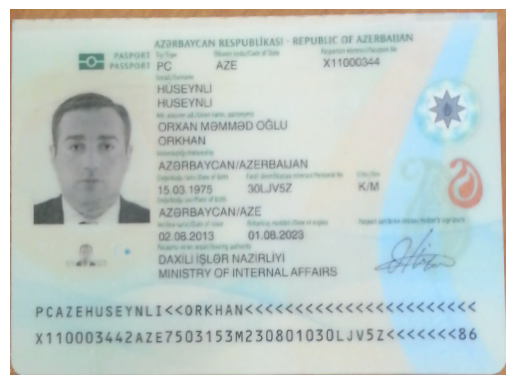

In [12]:
INPUT_FILE = "dataset/train/test_frames/image/image449.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'5.png', bbox_inches='tight')

Prediction...


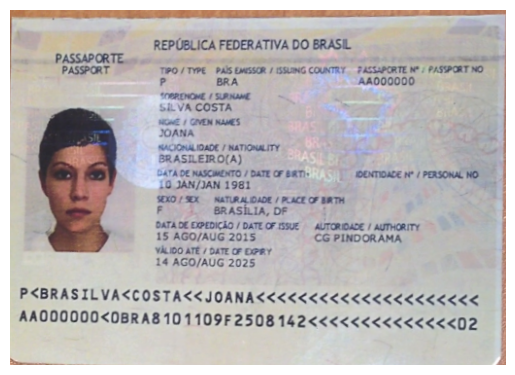

In [13]:
INPUT_FILE = "dataset/train/test_frames/image/image520.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'6.png', bbox_inches='tight')

Prediction...


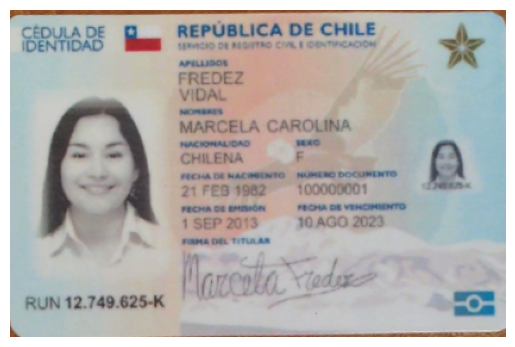

In [14]:
INPUT_FILE = "dataset/train/test_frames/image/image603.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'7.png', bbox_inches='tight')

Prediction...


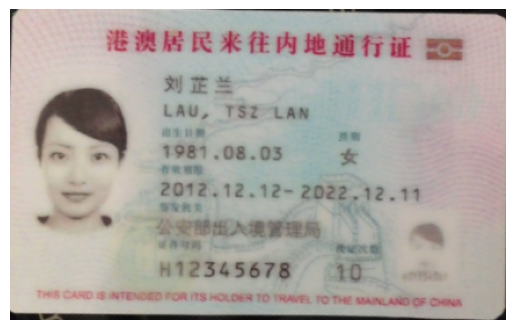

In [15]:
INPUT_FILE = "dataset/train/test_frames/image/image672.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'8.png', bbox_inches='tight')

Prediction...


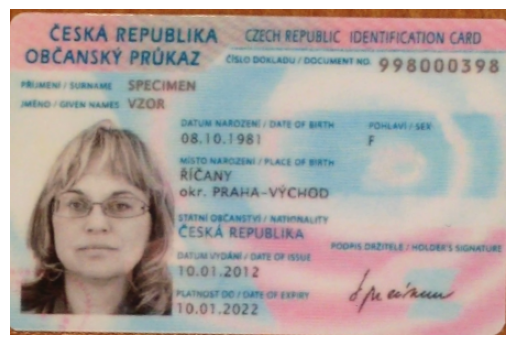

In [16]:
INPUT_FILE = "dataset/train/test_frames/image/image874.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'9.png', bbox_inches='tight')

Prediction...


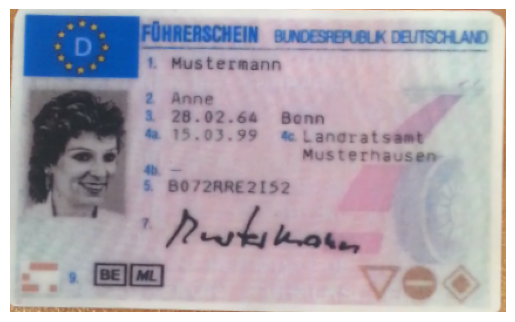

In [17]:
INPUT_FILE = "dataset/train/test_frames/image/image1077.png"

img, w, h = image.load_image(INPUT_FILE)

print('Prediction...')
output_image = predict_image(model, img)

mask_image = cv2.resize(output_image, (w, h))
raw_image = cv2.imread(INPUT_FILE)
warped = image.extract_idcard(raw_image, mask_image)

plt.axis('off')
plt.imshow(warped)
plt.savefig(database +'10.png', bbox_inches='tight')